In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../resources/additional_data/20250708-Colocalization results.csv")

In [3]:
df

,GFP-Sting,2B-Sting,2B(D29N)-Sting
0,0.341,0.380,0.689
1,-0.464,0.351,0.800
2,-0.363,0.796,0.950
3,-0.518,0.483,0.915
4,-0.288,0.637,0.826
5,-0.238,0.678,0.875
6,-0.415,0.274,0.887
7,0.523,-0.005,0.124
8,-0.208,0.333,0.616
9,-0.522,-0.006,0.425


In [4]:
%load_ext rpy2.ipython

Python(27699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(27700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [13]:
%%R -i df 

library(tidyr)

df_long <- pivot_longer(
  df,
  cols = everything(),
  names_to = "condition",
  values_to = "value"
)

df_clean <- na.omit(df_long)

/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [21]:
%%R 

# One-way ANOVA
anova_result <- aov(value ~ condition, data = df_clean)
summary(anova_result)


            Df Sum Sq Mean Sq F value Pr(>F)    
condition    2  12.59   6.294    95.1 <2e-16 ***
Residuals   68   4.50   0.066                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### check normality

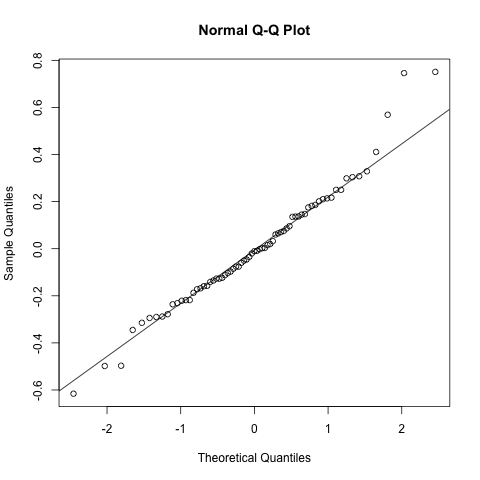

In [20]:
%%R

# Q-Q plot
qqnorm(residuals(anova_result))
qqline(residuals(anova_result))


In [19]:
%%R

# Shapiro-Wilk test
shapiro.test(residuals(anova_result))


	Shapiro-Wilk normality test

data:  residuals(anova_result)
W = 0.97155, p-value = 0.1066



### check equal variances

In [23]:
%%R 

# Levene's Test (car package required)
library(car)
leveneTest(value ~ condition, data = df_long)

R[write to console]: Lade nötiges Paket: carData



Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  2  1.8606 0.1634
      68               


### Pairwise comparison

In [16]:
%%R

# Tukey's Honest Significant Difference test
tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ condition, data = df_clean)

$condition
                               diff        lwr         upr     p adj
2B-Sting-2B(D29N)-Sting  -0.2476364 -0.4334924 -0.06178028 0.0059793
GFP-Sting-2B(D29N)-Sting -0.9676246 -1.1446672 -0.79058192 0.0000000
GFP-Sting-2B-Sting       -0.7199882 -0.8970309 -0.54294555 0.0000000



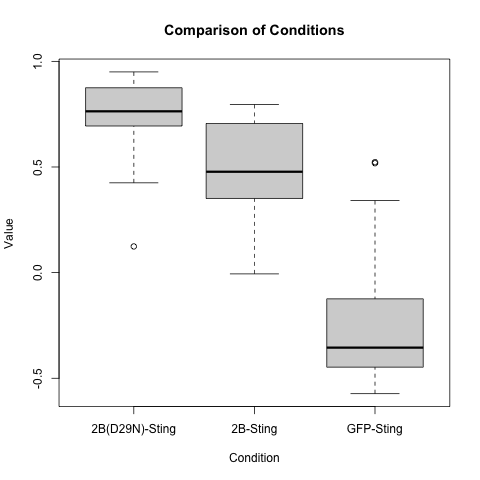

In [17]:
%%R 

# Boxplot for visualization
boxplot(value ~ condition, data = df_clean, main = "Comparison of Conditions", ylab = "Value", xlab = "Condition")
